Module config

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

import scipy.stats as sp

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Seaborn config

In [2]:
% matplotlib inline
sns.set(style='white')

Filesystem config

In [3]:
derivs = Path().absolute().parents[1] / 'derivatives'
source_dir = derivs / '0.4.joined'
alt_source_dir = derivs / '20190218'
figures_dir = derivs / 'figures'

Import data

In [4]:
data = pd.read_csv( source_dir / 'all_subject_level.csv' )
data = pd.read_csv( alt_source_dir / 'all_subject_level_bound.csv')

# Demographics

In [5]:
(data.groupby(['AgeGroup', 'Condition'], as_index=False)
    .agg({'sub':'count', 'Age':'mean', 'Gender':'mean'})
    .rename({'sub':'Count', 'Age':'Mean Age', 'Gender':'% Female'}, axis=1))

,AgeGroup,Condition,Count,Mean Age,% Female
0,OA,Annotated,15,71.400000,0.666667
1,OA,Original,15,76.466667,0.733333
2,OA,Video,18,74.611111,0.611111
3,YA,Annotated,26,18.500000,0.653846
4,YA,Original,27,18.851852,0.518519
5,YA,Video,23,19.043478,0.652174


In [6]:
(data.groupby(['AgeGroup', 'Condition'], as_index=False)
    .agg({'sub':'count', 'comp_change':'mean', 'comp_t1':'mean', 'comp_t2':'mean'})
    .rename({'sub':'Count', 'comp_t1':'T1', 'comp_t2':'T2', 'comp_change':'Mean Diff'}, axis=1))

,AgeGroup,Condition,Count,Mean Diff,T1,T2
0,OA,Annotated,15,2.333333,11.333333,13.666667
1,OA,Original,15,3.400000,11.066667,14.466667
2,OA,Video,18,3.722222,10.555556,14.277778
3,YA,Annotated,26,2.730769,10.576923,13.307692
4,YA,Original,27,4.111111,9.629630,13.740741
5,YA,Video,23,3.826087,9.782609,13.608696


# Group comparisons

In [7]:
vars_of_interest = ['comp_t1', 'comp_t2', 'comp_change', 'nb_CoR', 'nb_RT', 'procspd_RT',
                    'NFCS_sum','TSSI_sum', 'vocab_sum','SciLit_sum',
                    'SciTudeA_sum','SciTudeL_sum','SciTudeS_sum']

In [8]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations
We need to drop all missing data listwise. SPSS does this pairwise for the correlations, but I'm not sure how exactly to replicate that. If we find a way to, I would prefer not to destroy data unnecessarily here.

In [9]:
slim_data = data[['sub','AgeGroup','Condition']+vars_of_interest].dropna()

## Correlation Matrices

Define functions to create the correlation & significance tables and matrices

In [10]:
def corr_table(df):
    corr_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            corr_df.loc[c,d] = sp.pearsonr(df[c],df[d])[0]
    return(corr_df)

def sig_table(df):
    sig_df = pd.DataFrame()
    for c in vars_of_interest:
        for d in vars_of_interest:
            sig_df.loc[c,d] = sp.pearsonr(df[c],df[d])[1]
    return(sig_df)

In [11]:
def matrix_mask(df):
    mask = np.zeros_like(df)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(16,5))
    return(mask)

In [12]:
def correlation_matrix(df,title):
    mask = matrix_mask(df)
    fig = sns.heatmap(df, mask=mask, annot=True, cmap='Spectral',
                      fmt='.3f', linewidths=1, center=0)
    fig.set_title(title+'\nCorrelation Coefficients')
    return(fig)

def significance_matrix(df,title):
    mask = matrix_mask(df)
    myColors = (
        (0.4, 0.0, 0.0, 1.00),(0.6, 0.0, 0.0, 0.85),(0.8, 0.0, 0.0, 0.70),(1.0, 0.0, 0.0, 0.55),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
        (1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),(1.0, 0.0, 0.0, 0.40),
    )
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
    fig = sns.heatmap(df, mask=mask, annot=True, cmap=cmap,
                fmt='.3f', linewidths=1, center=0.5
               )
    fig.set_title(title+'\nCorrelation Significance')
    return(fig)

### All AgeGroups,Conditions

### By AgeGroup

### By Condition

## Correlograms

# Bound correlograms

Use `dvars + ivars` instead of `bound_vars`

In [13]:
ivars = ['SciLit_sum_bound', 'vocab_sum_bound',
            'NFCS_sum_bound', 'TSSI_sum_bound', 
            'procspd_RT_bound', 'nb_RT_bound']

In [14]:
dvars = ['comp_t1_bound', 'comp_t2_bound', 'comp_change_bound']

In [15]:
bound_vars = ['comp_change_bound', 'comp_t1_bound', 'comp_t2_bound', 'nb_RT_bound', 'nb_CoR_bound',
              'procspd_RT_bound', 'NFCS_sum_bound', 'TSSI_sum_bound', 'vocab_sum_bound']

I'm forced to drop null values before passing to `sns.pairplot()`, so we end up with fewer values:

In [16]:
print(
    data[['AgeGroup'] + bound_vars].shape[0],'->',
    data[['AgeGroup'] + bound_vars].dropna().shape[0]
)

140 -> 61


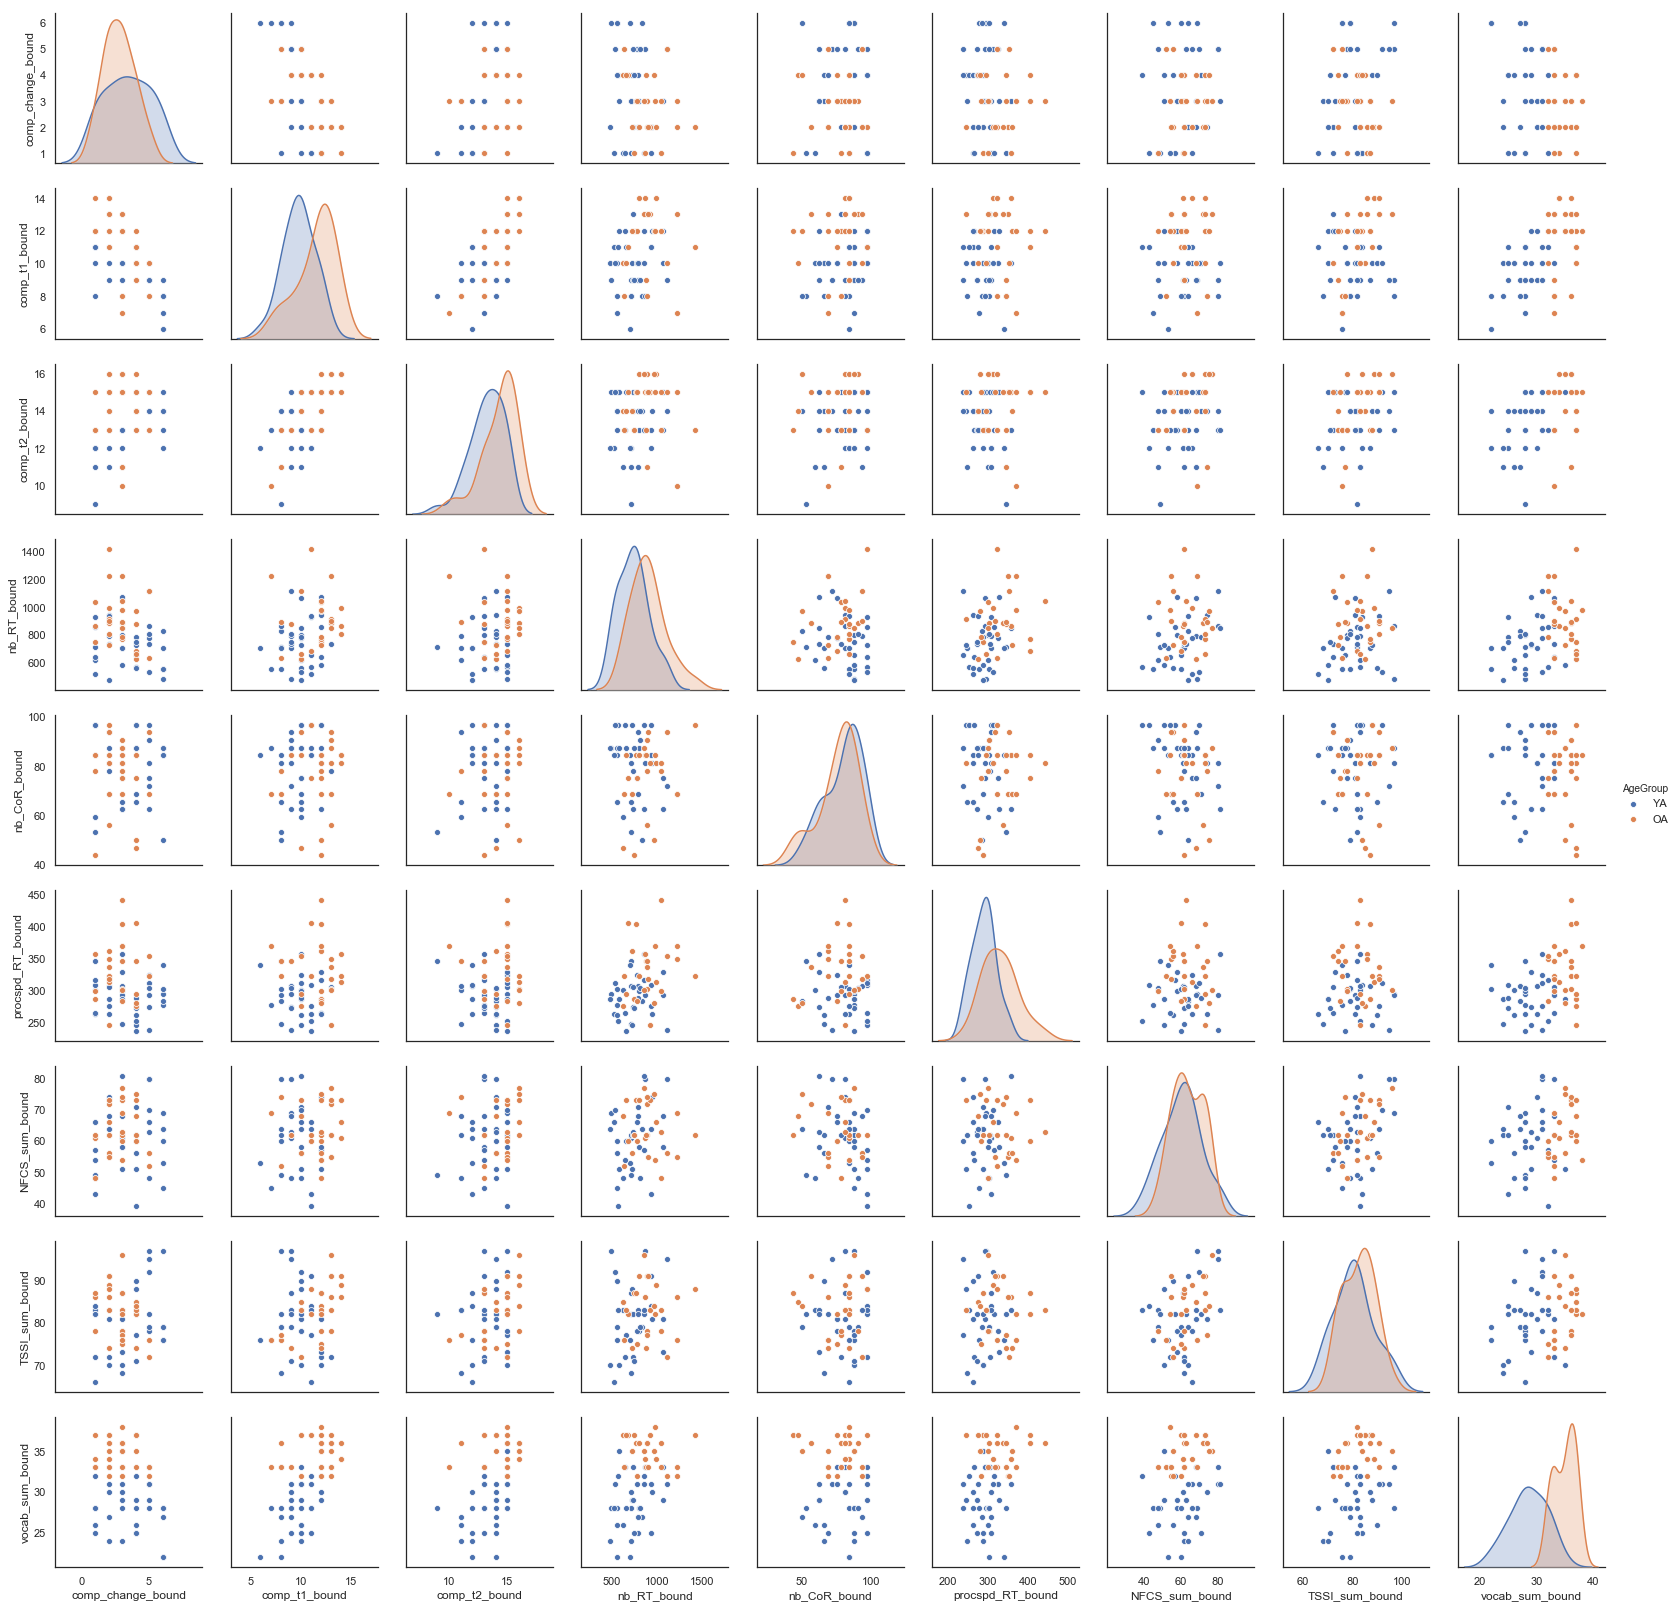

In [17]:
bound_pairplot_age = sns.pairplot(data[['AgeGroup'] + bound_vars].dropna(), hue='AgeGroup')
figpath = figures_dir / 'bound_pairplot_age.png'
bound_pairplot_age.savefig(figpath, bbox_inches = 'tight')

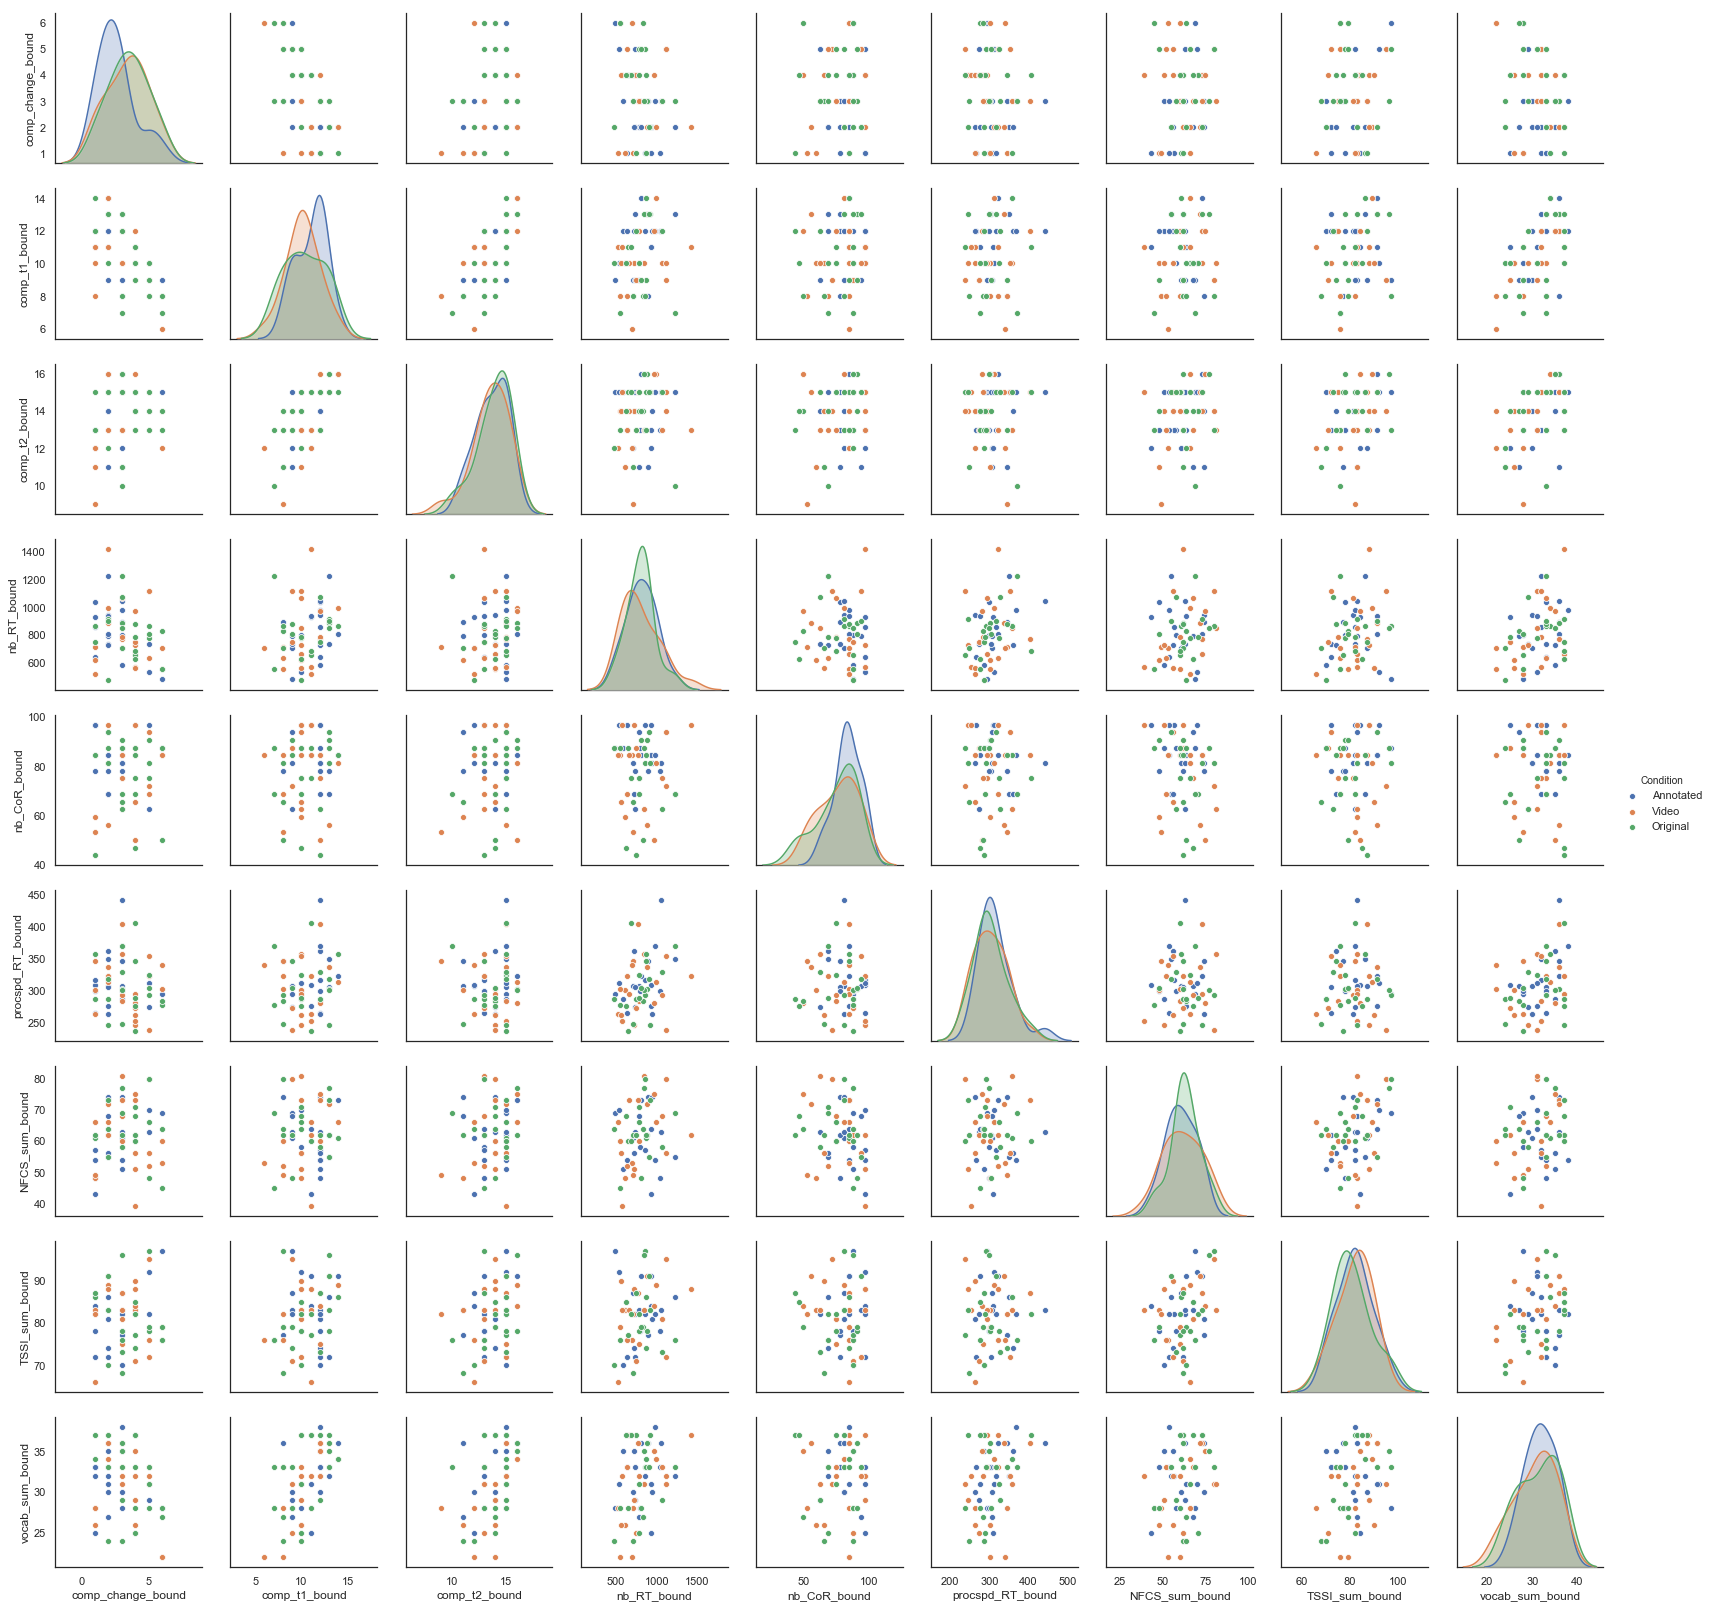

In [18]:
bound_pairplot_cond = sns.pairplot(data[['Condition'] + bound_vars].dropna(), hue='Condition')
figpath = figures_dir / 'bound_pairplot_cond.png'
bound_pairplot_cond.savefig(figpath, bbox_inches = 'tight')

### Z correlograms with exclusions

## Linear Model Plots

In [20]:
def my_lm_plot(x, y='comp_change_bound', x_jitter=0.0, y_jitter=0.3, hue='AgeGroup', group=None, data=data):
    if group == None:
        group = 'All'
    else:
        data = data.loc[data[hue] == group]
    
    fig = sns.lmplot(data=data, x=x, y=y,
                     x_jitter=x_jitter, y_jitter=y_jitter)
    figpath = figures_dir / ('lm_' + x +'_'+ y +'_'+ hue +'_'+ group + '.png')
    ax = plt.gca()
    ax.set_title((group+ ' subjects'))
    ax.get_figure().savefig(figpath)

In [21]:
jitters = {
    'SciLit_sum_bound': 0.2,
}

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


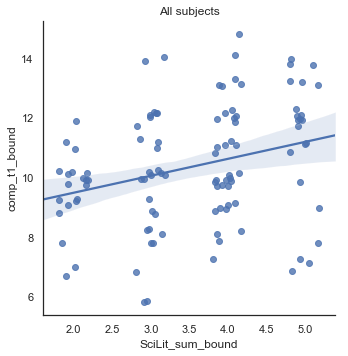

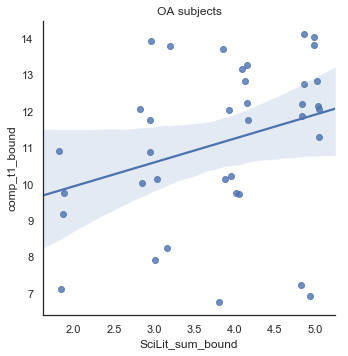

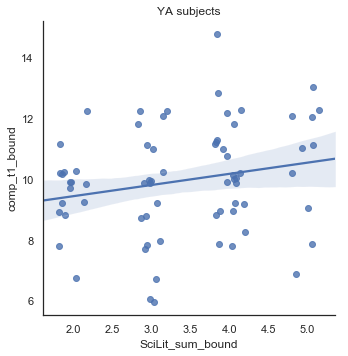

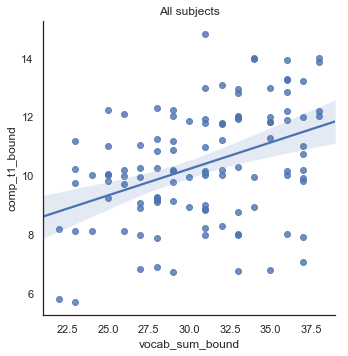

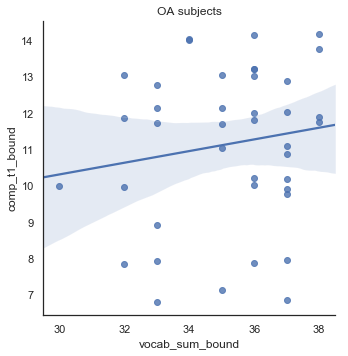

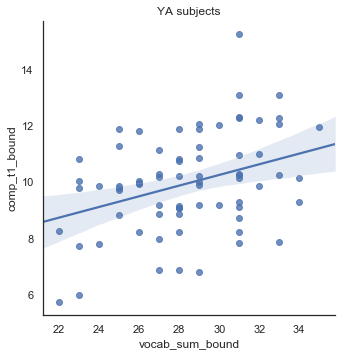

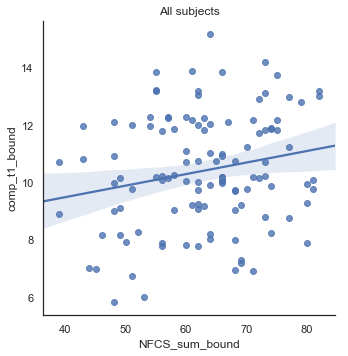

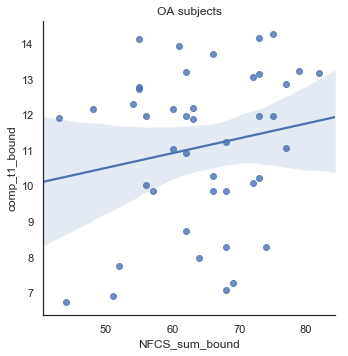

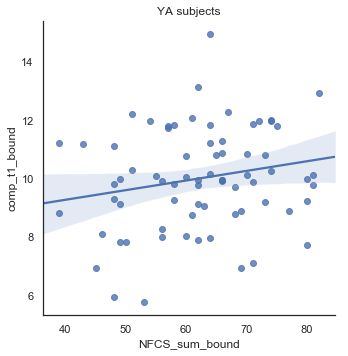

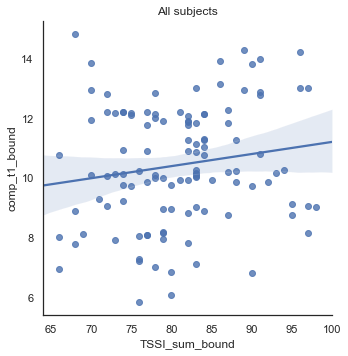

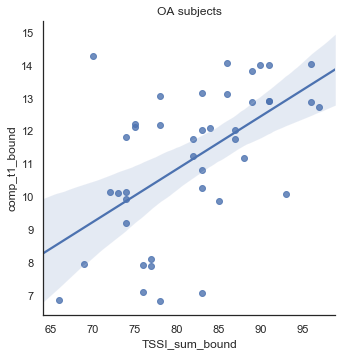

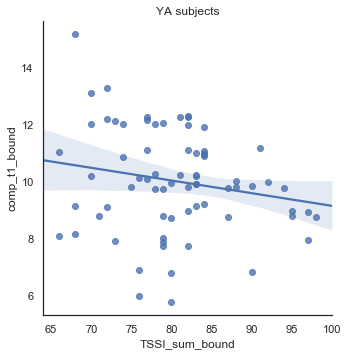

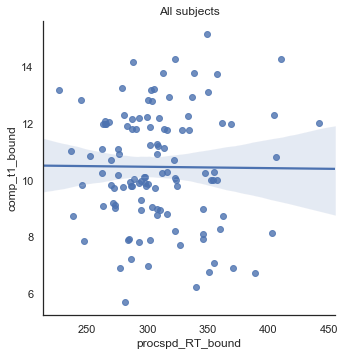

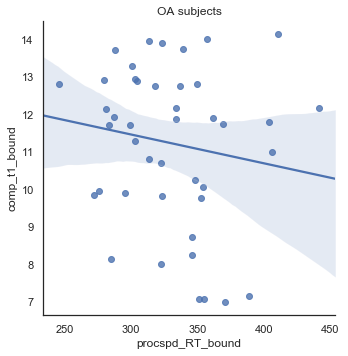

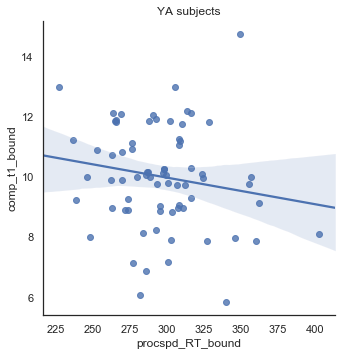

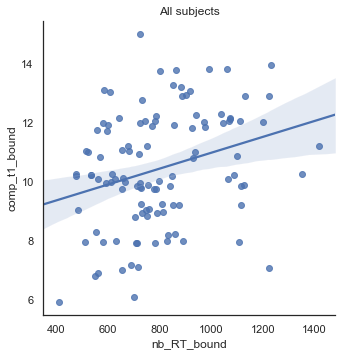

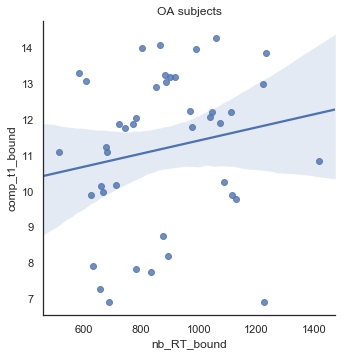

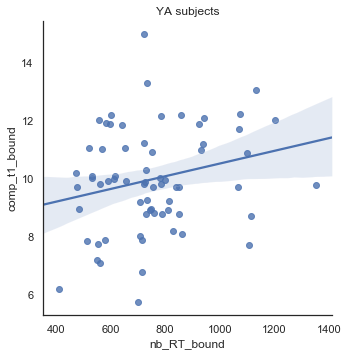

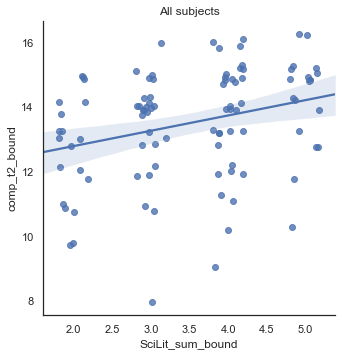

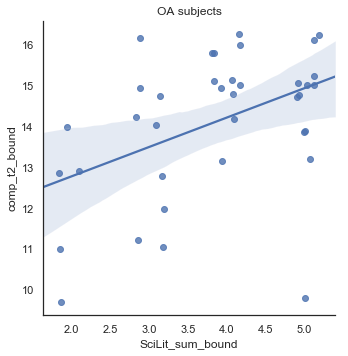

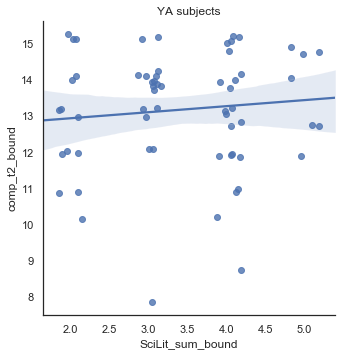

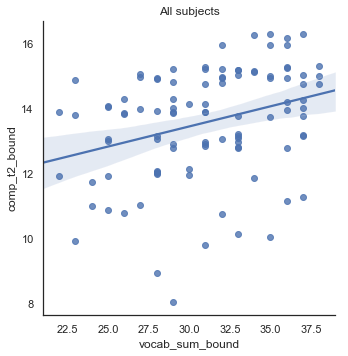

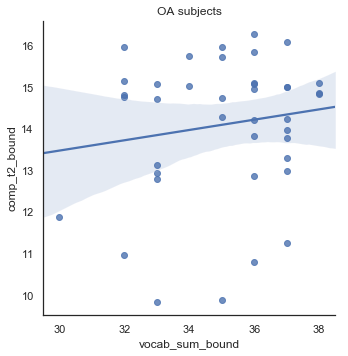

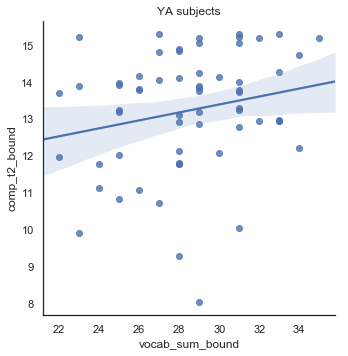

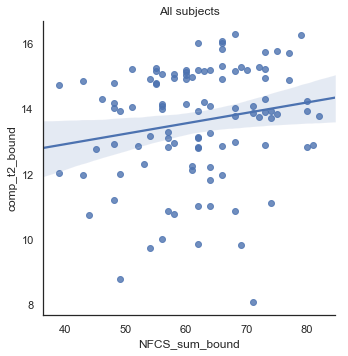

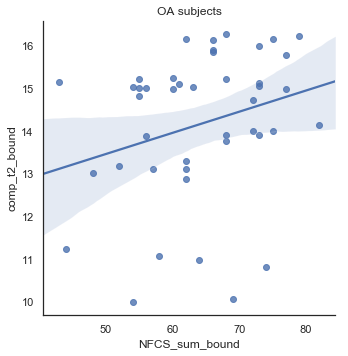

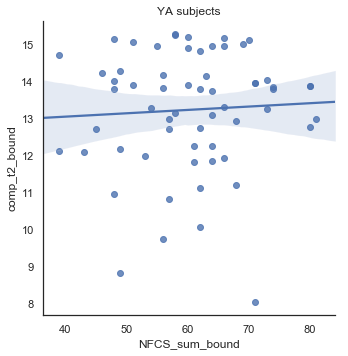

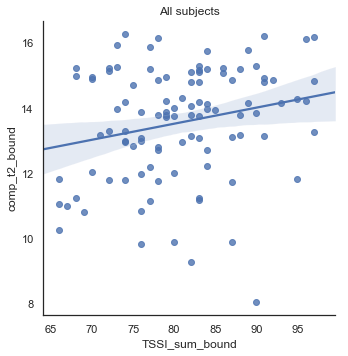

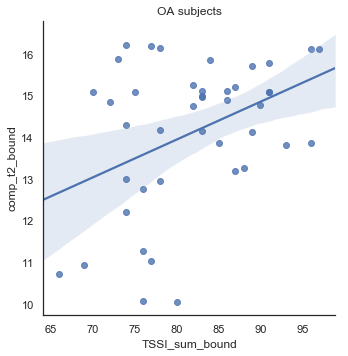

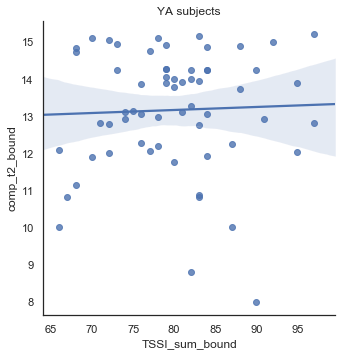

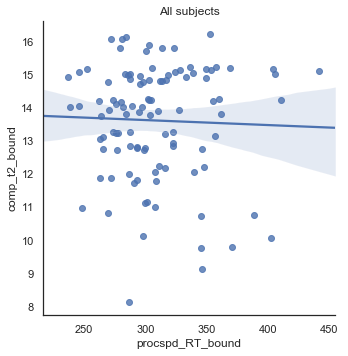

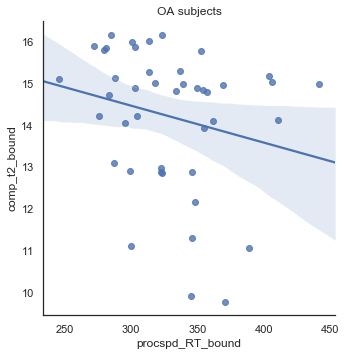

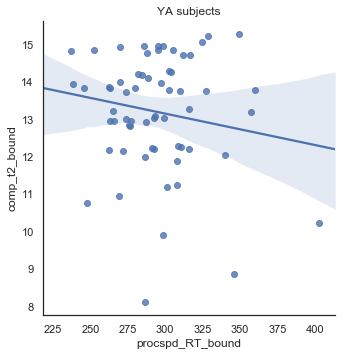

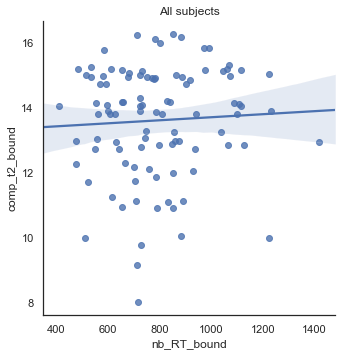

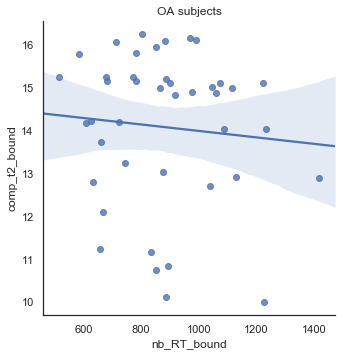

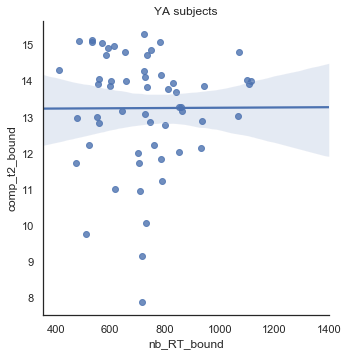

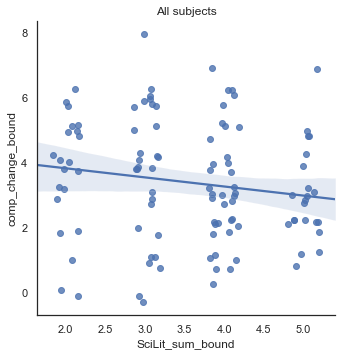

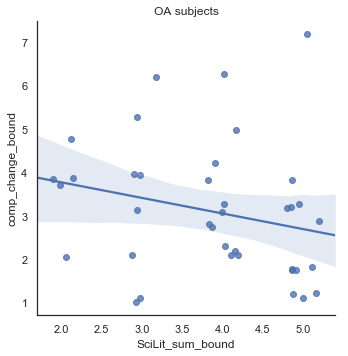

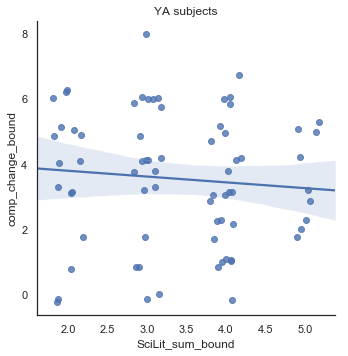

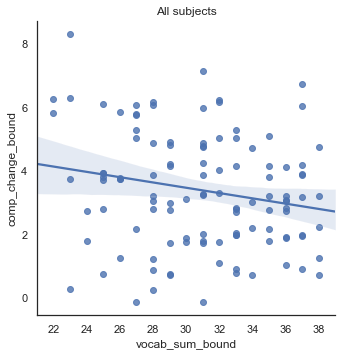

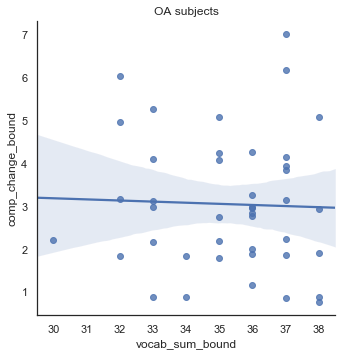

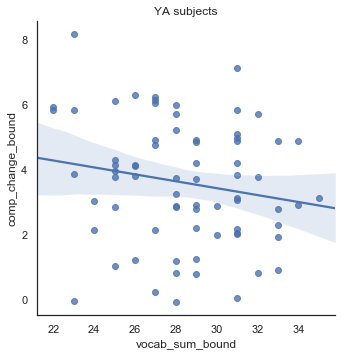

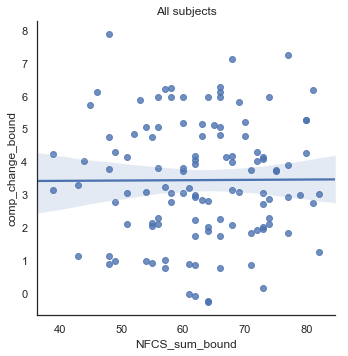

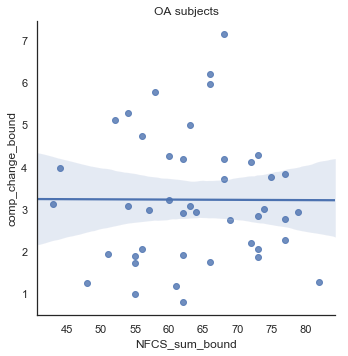

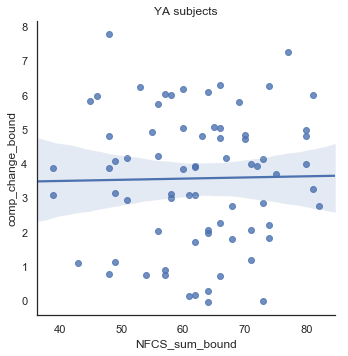

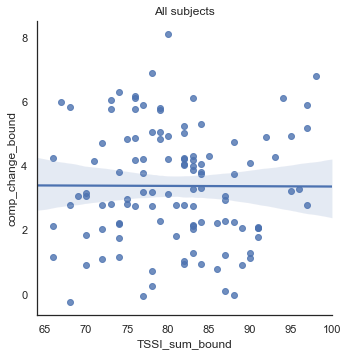

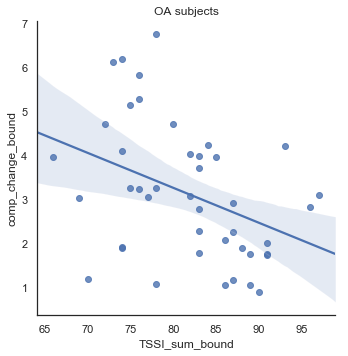

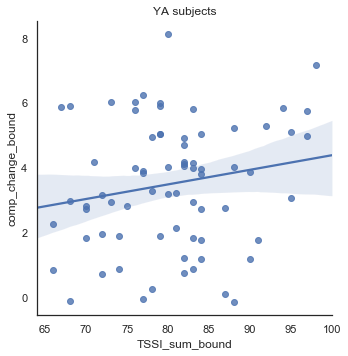

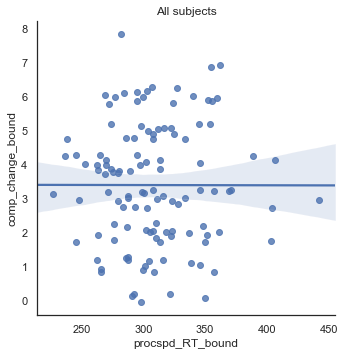

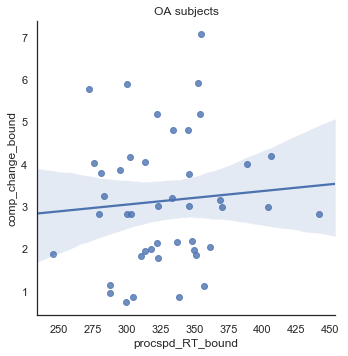

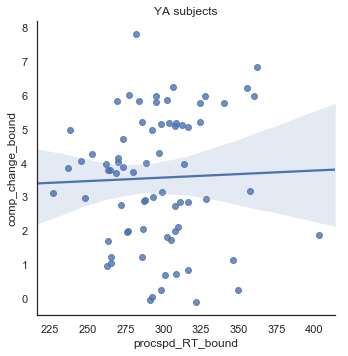

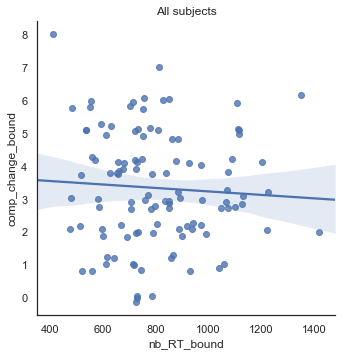

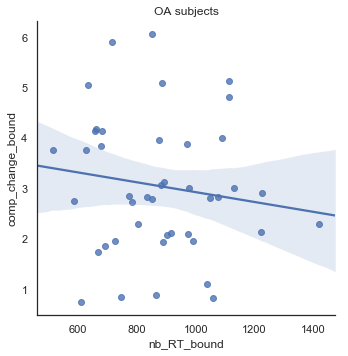

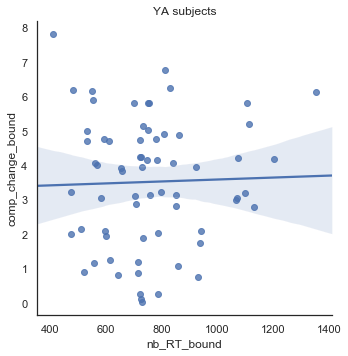

In [22]:
for dv in dvars:
    for iv in ivars:
        if iv in jitters.keys():
            xj = jitters[iv]
            my_lm_plot(x=iv, y=dv, x_jitter=xj)
            my_lm_plot(x=iv, y=dv, x_jitter=xj, group = 'OA')
            my_lm_plot(x=iv, y=dv, x_jitter=xj, group = 'YA')
        else:
            my_lm_plot(x=iv, y=dv)
            my_lm_plot(x=iv, y=dv, group = 'OA')
            my_lm_plot(x=iv, y=dv, group = 'YA')

# Horizontal Swarm, Strip, Box, Bar plots

In [26]:
plot_types = { 'swarm':sns.swarmplot, 'box':sns.boxplot, 'strip': sns.stripplot }
for p in plot_types.keys():
    for grpY in [['AgeGroup','Condition'], ['AgeGroup'], ['Condition']]:
        for varX in bound_vars:
            df = (data.dropna(subset=grpY)
                      .set_index(grpY))

            fig = plot_types[p](data=df, x=varX, y=df.index)


            fname = varX + '_'+ ''.join(grpY) +'_'+ p +'.png'
            fpath = figures_dir / fname
            print(fpath)

            fig.get_figure().savefig(fpath, bbox_inches='tight')
            plt.clf()

print('Done!')

R:\experiments\scilearn\derivatives\figures\comp_change_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\comp_t1_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\comp_t2_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\nb_RT_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\nb_CoR_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\procspd_RT_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\NFCS_sum_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\TSSI_sum_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\vocab_sum_bound_AgeGroupCondition_swarm.png
R:\experiments\scilearn\derivatives\figures\comp_change_bound_AgeGroup_swarm.png
R:\experiments\scilearn\derivatives\figures\comp_t1_bound_AgeGroup_swarm.png
R:\experiments\scilearn\derivatives\figures\comp_t2_bound_Ag

<Figure size 432x288 with 0 Axes>